In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import express as ex
from matplotlib import style
style.use('fivethirtyeight')


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Benkyou/datasets ML/winequality-red.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.011257
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.105533
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.000000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.000000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Outlier checking

In [ ]:
class OutLierTreatment:
  def IQR(self,datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    iqr = Q3 - Q1
    lower_range = Q1 - (1.5*iqr)
    upper_range = Q3 + (1.5*iqr)
    return round(lower_range,3),round(upper_range,3)
  def Treat(self,data):
    l,r = self.IQR(data)
    for i in range(len(data)):
      if data[i] > r:
        data[i] = r
      if  data[i] <l:
        data[i] =l
  
  def check(self,data):
    l,r=self.IQR(data)
    print(l,r)
    j=0
    for i in data:
      if i<l or i>r:
        j=j+1
      return j

In [ ]:
out = OutLierTreatment()
for i in df.columns.to_list():
  print(out.check(df[i]))


-0.058 0.686
0
-0.072 0.613
0
-0.405 0.915
0
-0.003 0.188
0
0.047 0.18
0
-0.211 0.577
0
-0.155 0.41
0
0.16 0.816
0
0.146 0.744
0
-0.03 0.401
0
-0.2 0.785
0
0.0 0.0
0


No outliers


Scaling Using Scratch

In [ ]:
import pandas as pd
class Scaler:
  def MinMaxScaler(self,datacolumn):
    self.min,self.max=min(datacolumn),max(datacolumn)
    for i in range(len(datacolumn)):
      datacolumn[i] = (datacolumn[i]-self.min)/(self.max-self.min)
    
    return datacolumn
  
  def StandardScaler(self,datacolumn):
    self.var,self.mean = pd.var(datacolumn),mean(datacolumn)
    for i in range(len(datacolumn)):
      datacolumn[i] = (datacolumn[i]-self.mean)/(self.var)
    return datacolumn

In [ ]:
scale = Scaler()
for i in df.columns.to_list():
  df[i]=scale.MinMaxScaler(df[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0


#Exploratory Analysis


In [ ]:
p = ex.scatter_matrix(df.head(10),labels=df.columns.to_list(),color=[i for i in range(len(df.columns.to_list())-2)])
p.show()

In [ ]:
sns.pairplot(df,hue='quality')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

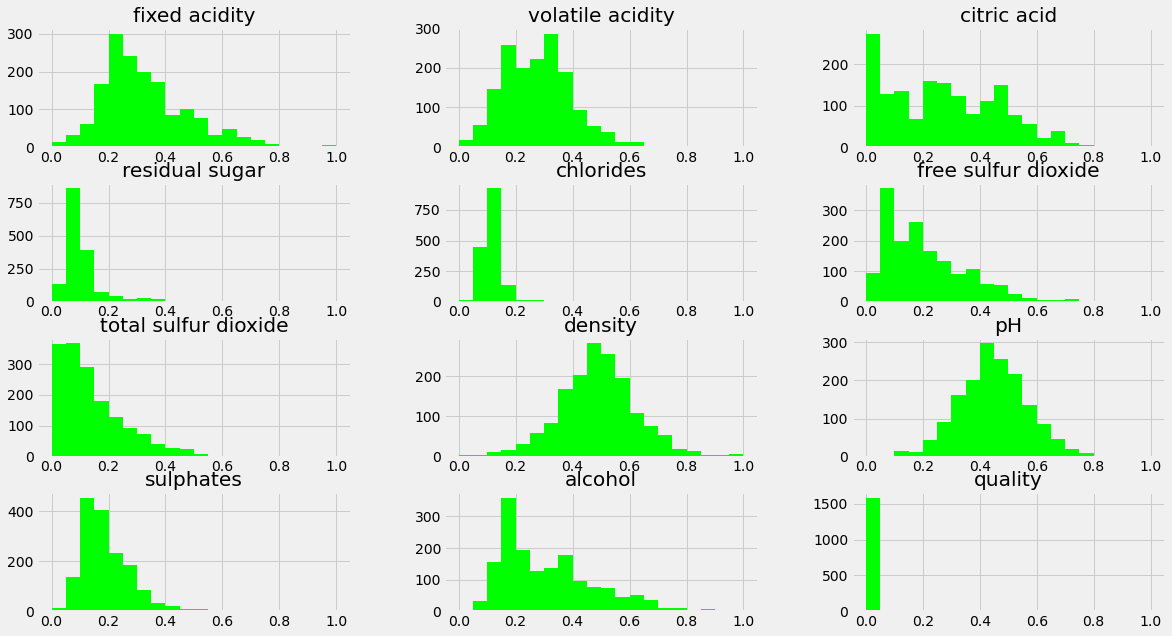

In [ ]:
df.hist(bins=20,figsize=(18,10),color ='lime')
plt.show()

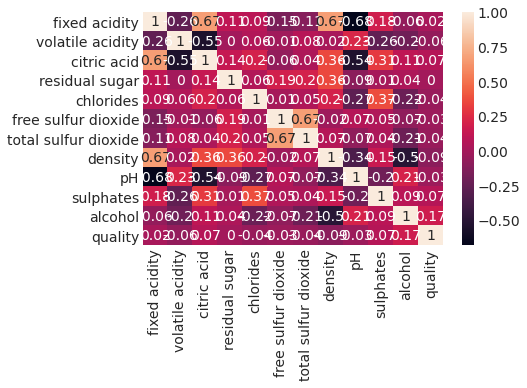

In [ ]:
sns.set_style('ticks')
sns.heatmap(df.corr().round(2),annot=True)
plt.show()

In [ ]:
# fig = plt.figure(figsize = (10, 25))
# j = 0
# #feature_names = df.columns.to_list()
# feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH','sulphates', 'alcohol']
# #feature_names.remove('quality')
# for i in feature_names:
#     plt.subplot(5, 2, j+1)
#     sns.distplot(df[i][df['quality']==3], color='red', label = '3')
#     sns.distplot(df[i][df['quality']==4], color='green', label = '4')
#     sns.distplot(df[i][df['quality']==5], color='blue', label = '5')
#     sns.distplot(df[i][df['quality']==6], color='violet', label = '6')
#     sns.distplot(df[i][df['quality']==7], color='purple', label = '7')
#     sns.distplot(df[i][df['quality']==8], color='darkgreen', label = '8')
#     plt.legend(loc='best')
# fig.suptitle('Wine Quality Data Analysis')
# fig.tight_layout()
# fig.subplots_adjust(top=0.90)
# plt.show()

#Train Test Split

In [ ]:
def split_test_train(x,y,train_size =0.80,seed=None):
  np.random.seed(seed)
  y=np.array(y)
  data=np.concatenate([x,y.reshape(-1,1)],axis=1)
  np.random.shuffle(data)
  xtrain=data[:int(len(data)*train_size),:-1]
  ytrain=data[:int(len(data)*train_size),-1]
  xtest=data[int(len(data)*train_size):,:-1]
  ytest=data[int(len(data)*train_size):,-1]
  return xtrain,ytrain,xtest,ytest

In [ ]:
x = df.drop(columns='quality',inplace=False)
y = df['quality']
xtrain,ytrain,xtest,ytest = split_test_train(x,y,train_size=0.80,seed=0)
print('Train data shapes \nx =',xtrain.shape,'y= ',ytrain.shape,'\nTest data shapes\nx =',xtest.shape,'y =',ytest.shape)

Train data shapes 
x = (1279, 11) y=  (1279,) 
Test data shapes
x = (320, 11) y = (320,)


#KNN SCRATCH

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
''' BASICALLY WE USE EUCLIDEAN AND MANHATAN DISTANCE FOR KNN '''
from collections import Counter
class K_Nearest_Neighbor:
    def __init__(self,k=5):
        self.k = k
        
    def Euclidean_distance(self,p1,p2):
        return np.sqrt(np.sum((p1-p2)**2))
    def Manhatan_distance(self,C,W):
        return C+W
        
    #fit training sample and label
    def fit(self,x,y):
        self.xtrain =x
        self.ytrain =y
    #pridict methot
    def predict(self,X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    
    def _predict(self,x):
        #calculate Euclidean or MAnhatan
        # get k nearest sample 
        # choose most common class label
        distance = [self.Euclidean_distance(x,i) for i in self.xtrain]
        k_index = np.argsort(distance)[:self.k]
        k_nearest_label = [self.ytrain[i] for i in k_index]
        
        most_common = Counter(k_nearest_label).most_common(1)
        return most_common[0][0]



In [ ]:
kn = K_Nearest_Neighbor(k=11)
kn.fit(xtrain,ytrain)

In [ ]:
pred = kn.predict(xtest)
pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
print('Accuracy=',(accuracy_score(pred,ytest)*100),'%')

Accuracy= 99.375 %


KNN from scikit


In [ ]:
from sklearn.neighbors import KNeighborsClassifier as LR

In [ ]:
lr = LR(n_neighbors=11)
lr.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [ ]:
ypred = lr.predict(xtest)
print(ypred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
ytest

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
df['quality'].unique()

array([0, 1])

In [ ]:
print('Accuracy=',(accuracy_score(ypred,ytest)*100),'%')

Accuracy= 99.375 %


In [ ]:
import matplotlib
matplotlib.use('GTK3Agg')

In [ ]:
ytrainpred = lr.predict(xtrain)

In [ ]:
print('Accuracy=',(accuracy_score(ytrainpred,ytrain)*100),'%')

Accuracy= 98.74902267396403 %


In [ ]:
from matplotlib.colors import ListedColormap

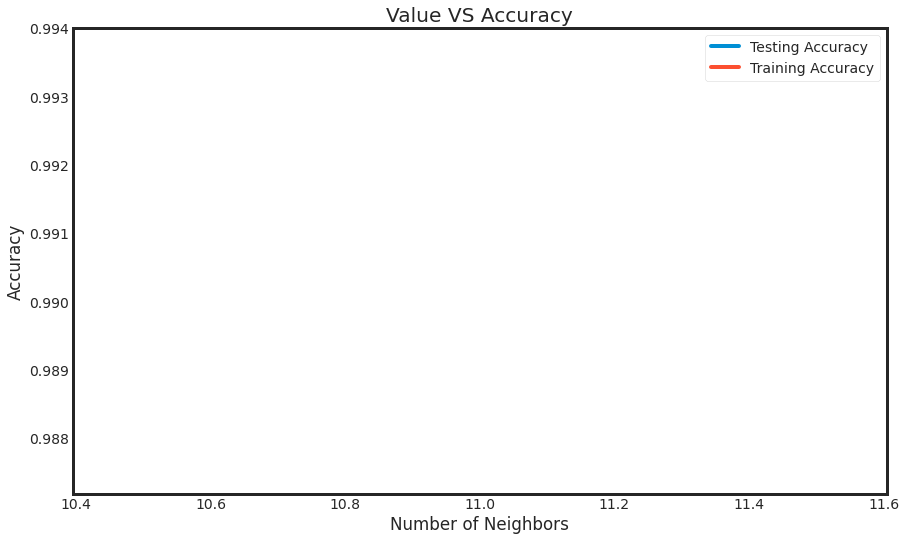

In [ ]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

#xx, yy = np.meshgrid(np.arange(min(x)-1, max(x)+1, 0.2),np.arange(min(y), max(y), 0.2))
length=11
plt.figure(figsize=[13, 8])
plt.plot(11, 0.9937, label="Testing Accuracy")
plt.plot(11, 0.9874902267396403, label="Training Accuracy")
plt.legend()
plt.title("Value VS Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()